## Importing Libraries and Defining Plots

In [28]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import math

In [29]:
def get_frequency_table(column, sort=False):
    count = column.value_counts()
    if sort:
        count = count.sort_index()
    frequency_table = pd.DataFrame({'value': count.index, 'count': count.values})
    frequency_table['freq'] = [None] * len(frequency_table)
    frequency_table['freq_acc'] = [None] * len(frequency_table)

    total = frequency_table['count'].sum()

    for i, row in frequency_table.iterrows():
        freq = round(row['count'] / total, 2)
        prev_freq_acc = 0 if i == 0 else frequency_table.at[i-1, 'freq_acc']
        frequency_table.at[i, 'freq'] = freq
        frequency_table.at[i, 'freq_acc'] = freq + prev_freq_acc
    return frequency_table

def plot_histogram(column, bin_edges=None):
    plt.figure(figsize=(4, 4))
    if not bin_edges:
        bin_edges = list(range(int(column.min()) - 1, int(column.max()) + 2))
    plt.hist(column, density=True, bins=bin_edges, edgecolor='black')
    plt.show()

def plot_pie(frequency_table, column_name):
    plt.figure(figsize=(4, 4))
    frequency_table = frequency_table.set_index("value")
    frequency_table["count"].plot.pie(autopct='%1.1f%%', startangle=90)
    plt.show()

def plot_boxplot(column):
    plt.figure(figsize=(4, 4))
    column.plot.box()
    plt.title('Boxplot')
    plt.show()

## Exercises:

## 1.
A coin is tossed three times and the sequence of heads and tails is recorded.
<br>
a. List the sample space.
<br>
b. List the elements that make up the following events: (1) A = at least two
heads, (2) B = the first two tosses are heads, (3) C = the last toss is a tail.
<br>
c. List the elements of the following events: (1) A^c, (2) A ∩ B, (3) A ∪ C.


In [30]:
# listing sample space
coin = ['HHH', 'HHT', 'HTH', 'HTT', 'THH', 'THT', 'TTH', 'TTT']
sample = np.array(coin)
print("a) Sample Space: \n Ω =", sample)

# get list of events with two heads
list2 = []

for i in sample:
  if 'H' + 'H' in i or 'H' + 'T' + 'H' in i:
    list2.append(i)

A = np.array(list2)
print("\nb)\n(1) A = ", A)

# get first two heads only
list3 = []

for j in sample:
  if 'HH' in j and 'T' not in j[0:1]:
    list3.append(j)

B = np.array(list3)
print("(2) B = ", B)

# get last toss as tail
list4 = []

for k in sample:
  if 'T' in k[2]:
    list4.append(k)

C = np.array(list4)
print("(3) C = ", C)

# Complement of A

Ac = np.setdiff1d(sample, A)
print("\nc)\n(1) Ac = ", Ac)

# A intersection with B

AiB = np.intersect1d(A, B)
print("(2) A ∩ B = ", AiB)

# A union with C

AuC = np.union1d(A, C)
print("(3) A ∪ C = ", AuC)

a) Sample Space: 
 Ω = ['HHH' 'HHT' 'HTH' 'HTT' 'THH' 'THT' 'TTH' 'TTT']

b)
(1) A =  ['HHH' 'HHT' 'HTH' 'THH']
(2) B =  ['HHH' 'HHT']
(3) C =  ['HHT' 'HTT' 'THT' 'TTT']

c)
(1) Ac =  ['HTT' 'THT' 'TTH' 'TTT']
(2) A ∩ B =  ['HHH' 'HHT']
(3) A ∪ C =  ['HHH' 'HHT' 'HTH' 'HTT' 'THH' 'THT' 'TTT']


##3.
An urn contains three red balls, two green balls, and one white ball. Three balls are drawn without replacement from the urn, and the colors are noted in sequence.
<br>
List the sample space. Define events A, B, and C as you wish and find their unions and intersections.

In [31]:
import itertools

# listing sample space
ball = ['RRRGGW']

*sample, = itertools.permutations(*ball, 3)

sample = np.array(sample)

print("Sample Space: \nΩ =", sample)

Sample Space: 
Ω = [['R' 'R' 'R']
 ['R' 'R' 'G']
 ['R' 'R' 'G']
 ['R' 'R' 'W']
 ['R' 'R' 'R']
 ['R' 'R' 'G']
 ['R' 'R' 'G']
 ['R' 'R' 'W']
 ['R' 'G' 'R']
 ['R' 'G' 'R']
 ['R' 'G' 'G']
 ['R' 'G' 'W']
 ['R' 'G' 'R']
 ['R' 'G' 'R']
 ['R' 'G' 'G']
 ['R' 'G' 'W']
 ['R' 'W' 'R']
 ['R' 'W' 'R']
 ['R' 'W' 'G']
 ['R' 'W' 'G']
 ['R' 'R' 'R']
 ['R' 'R' 'G']
 ['R' 'R' 'G']
 ['R' 'R' 'W']
 ['R' 'R' 'R']
 ['R' 'R' 'G']
 ['R' 'R' 'G']
 ['R' 'R' 'W']
 ['R' 'G' 'R']
 ['R' 'G' 'R']
 ['R' 'G' 'G']
 ['R' 'G' 'W']
 ['R' 'G' 'R']
 ['R' 'G' 'R']
 ['R' 'G' 'G']
 ['R' 'G' 'W']
 ['R' 'W' 'R']
 ['R' 'W' 'R']
 ['R' 'W' 'G']
 ['R' 'W' 'G']
 ['R' 'R' 'R']
 ['R' 'R' 'G']
 ['R' 'R' 'G']
 ['R' 'R' 'W']
 ['R' 'R' 'R']
 ['R' 'R' 'G']
 ['R' 'R' 'G']
 ['R' 'R' 'W']
 ['R' 'G' 'R']
 ['R' 'G' 'R']
 ['R' 'G' 'G']
 ['R' 'G' 'W']
 ['R' 'G' 'R']
 ['R' 'G' 'R']
 ['R' 'G' 'G']
 ['R' 'G' 'W']
 ['R' 'W' 'R']
 ['R' 'W' 'R']
 ['R' 'W' 'G']
 ['R' 'W' 'G']
 ['G' 'R' 'R']
 ['G' 'R' 'R']
 ['G' 'R' 'G']
 ['G' 'R' 'W']
 ['G' 'R' 'R']
 ['G' 

In [32]:

# A event is the probability of getting 3 red balls
lista = []

lista.append(sample[0])

A = np.array(lista)
print("\nA event occurs when red is drawn three times.\nA: ", A)

# B event is the probability of getting a green ball in the last draw
listb = []

for i in sample:
  if 'G' in i[2]:
    listb.append(i)

B = np.array(listb)
print("\nB event occurs when green is drawn on the last draw.\nB: ", B)

# C event is the probability of getting a red ball in the second draw
listc = []

for j in sample:
  if 'R' in j[1]:
    listc.append(j)

C = np.array(listc)

print("\nC event occurs when red is drawn on the second draw.\nC: ", C)

#The union of all events

listu = [*A, *B, *C]

union = np.array(listu)

print("\nUnion\n(A U B U C): \n", union)

#The intersection of all events

aset = set([tuple(x) for x in A])
bset = set([tuple(x) for x in B])
cset = set([tuple(x) for x in C])

intersection = np.array([x for x in aset & bset & cset])
print("\nIntersection\n(A ∩ B ∩ C): \n", intersection)


A event occurs when red is drawn three times.
A:  [['R' 'R' 'R']]

B event occurs when green is drawn on the last draw.
B:  [['R' 'R' 'G']
 ['R' 'R' 'G']
 ['R' 'R' 'G']
 ['R' 'R' 'G']
 ['R' 'G' 'G']
 ['R' 'G' 'G']
 ['R' 'W' 'G']
 ['R' 'W' 'G']
 ['R' 'R' 'G']
 ['R' 'R' 'G']
 ['R' 'R' 'G']
 ['R' 'R' 'G']
 ['R' 'G' 'G']
 ['R' 'G' 'G']
 ['R' 'W' 'G']
 ['R' 'W' 'G']
 ['R' 'R' 'G']
 ['R' 'R' 'G']
 ['R' 'R' 'G']
 ['R' 'R' 'G']
 ['R' 'G' 'G']
 ['R' 'G' 'G']
 ['R' 'W' 'G']
 ['R' 'W' 'G']
 ['G' 'R' 'G']
 ['G' 'R' 'G']
 ['G' 'R' 'G']
 ['G' 'W' 'G']
 ['G' 'R' 'G']
 ['G' 'R' 'G']
 ['G' 'R' 'G']
 ['G' 'W' 'G']
 ['W' 'R' 'G']
 ['W' 'R' 'G']
 ['W' 'R' 'G']
 ['W' 'R' 'G']
 ['W' 'R' 'G']
 ['W' 'R' 'G']
 ['W' 'G' 'G']
 ['W' 'G' 'G']]

C event occurs when red is drawn on the second draw.
C:  [['R' 'R' 'R']
 ['R' 'R' 'G']
 ['R' 'R' 'G']
 ['R' 'R' 'W']
 ['R' 'R' 'R']
 ['R' 'R' 'G']
 ['R' 'R' 'G']
 ['R' 'R' 'W']
 ['R' 'R' 'R']
 ['R' 'R' 'G']
 ['R' 'R' 'G']
 ['R' 'R' 'W']
 ['R' 'R' 'R']
 ['R' 'R' 'G']
 ['R' 

## 7.
Prove Bonferroni’s inequality:
\begin{equation} P(A ∩ B) ≥ P(A) + P(B) − 1 \end{equation}

\begin{equation} P(A ∩ B) ≥ P(A) + P(B) − 1 \end{equation}

## 9.
The weather forecaster says that the probability of rain on Saturday is 25% and that the probability of rain on Sunday is 25%.
<br>
Is the probability of rain during the weekend 50%? Why or why not?

In [33]:
saturday_probability = 0.25
sunday_probability = 0.25

weekend_probability = saturday_probability + sunday_probability - (saturday_probability*sunday_probability)
print(weekend_probability)

0.4375


Acoording to the Addition Law:
<br>
<br>
\begin{equation} P(A U B) = P(A) + P(B) - P(A ∩ B) \end{equation}

<br>
Since A and B are independent events,
<br>
<br>
\begin{equation} P(A ∩ B) = P(A)\cdot P(B)  \end{equation}

\begin{equation} P(A U B) = 0.25 + 0.25 - (0.25 \cdot 0.25) = 0.4375\end{equation}

##11.
The first three digits of a university telephone exchange are 452.
<br>
If all the sequences of the remaining four digits are equally likely, what is the probability that a randomly selected university phone number contains seven distinct digits?

In [34]:
# listing sample space
possible_digits = ['1234567890']

*sample, = itertools.combinations_with_replacement(*possible_digits, 4)

sample = np.array(sample)

all_outcomes = len(sample)

print("Sample space size: \nΩ =", len(sample))

#removing duplicate values

for i in sample:
  if i[0] == i[1] or i[0] == i[2] or i[0] == i[3] or i[1] == i[2] or i[1] == i[3] or i[2] == i[3]:
    row = np.where((sample == i).all(axis=1))
    sample = np.delete(sample, row, axis=0)

print("\nSample space with distinct values (not counting first 3 digits): \nΩ =", len(sample))

# finding distinct digits arrays

count = 0

for n in sample:
  if '4' and '5' and '2' not in n:
    count += 1

print("\nNumber of distinct values:\nN =", count)

print("\nProbability of Unique Values:\nP(N) =", (count/all_outcomes))

Sample space size: 
Ω = 715

Sample space with distinct values (not counting first 3 digits): 
Ω = 210

Number of distinct values:
N = 126

Probability of Unique Values:
P(N) = 0.17622377622377622


\begin{equation} P(distinct) = \frac{7 \cdot 6 \cdot 5 \cdot 4}{10^4} = 0.084 \end{equation}

## 13.
In a game of poker, what is the probability that a five-card hand will contain
<br>
(a)
a straight (five cards in unbroken numerical sequence),
<br>
(b) four of a kind, and
<br>
(c)
a full house (three cards of one value and two cards of another value)?

In [35]:
#sample space

deck = 52
hand = 5
suit = 4

all_outcomes = math.comb(deck, hand)

print("Sample space size: \nΩ =", all_outcomes)

#sequence

# A-2-3-4-5
# 2-3-4-5-6
# 3-4-5-6-7
# 4-5-6-7-8
# 5-6-7-8-9
# 6-7-8-9-10
# 7-8-9-10-J
# 8-9-10-J-Q
# 9-10-J-Q-K
# 10-J-Q-K-A

sequence_types = 10

# For each card in the hand, there's 4 possible suits, that multiplied by the possible sequences for each suit
A = sequence_types * suit ** 5 - ( 4 * 10) #also remove the straight flush possible from every suit

print("\nProbability of a straight: \nP(A) =", (A/all_outcomes))


#four of a kind

# There are xxxxy ways of having four of a kind, so 13 possiblites of 4 cards and (13-1) different last cards for every suit
B = 13 * 12 * 4

print("\nProbability of four of a kind: \nP(B) =", (B/all_outcomes))

#full house

# There are xxxyy ways of having a full house, so 13 possibilites for 3 cards and(13-1) possibilites for 2 cards
C = 13 * 4 * 12 * 6 #beside that, choose 4 suits for 3 cards and 4 suits for 2 cards

print("\nProbability of a full house: \nP(C) =", (C/all_outcomes))

Sample space size: 
Ω = 2598960

Probability of a straight: 
P(A) = 0.003924646781789639

Probability of four of a kind: 
P(B) = 0.00024009603841536616

Probability of a full house: 
P(C) = 0.0014405762304921968


## 15.
How many different meals can be made from four kinds of meat, six vegetables,
and three starches if a meal consists of one selection from each group?

In [41]:
meat = ['M1', 'M2', 'M3', 'M4']
veggies = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6']
starches = ['S1', 'S2', 'S3']

*sample, = itertools.product(meat, veggies, starches)

sample = np.array(sample)

print("Sample space size: \nΩ =", len(sample))

Sample space size: 
Ω = 72


\begin{equation} Combination = {4!} \cdot {6!} \cdot {3!}  = 72 \end{equation}

## 17.
In acceptance sampling, a purchaser samples 4 items from a lot of 100 and rejects the lot if 1 or more are defective.
<br>
Graph the probability that the lot is accepted as a function of the percentage of defective items in the lot.

\begin{equation} P(A) = \frac{\begin{pmatrix}k \\ m \end{pmatrix}\begin{pmatrix} n - k \\ r - m \end{pmatrix}}{\begin{pmatrix}n \\ r \end{pmatrix}} \end{equation}

n = items
<br>
r = sample size
<br>
k = defective items
<br>
m = sample defective items

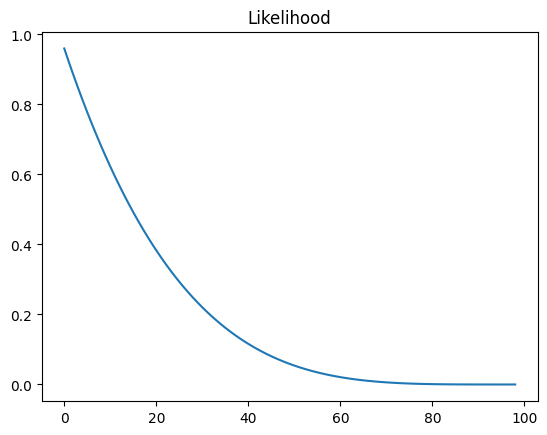

Highest chance of lot being accepted by amount of defective items:  0.96


In [102]:
import scipy.special as scp

n = 100
r = 4
m = 0

arr = []

p = 0

for k in range(1, 100):
  p = scp.binom(k, m) * scp.binom(n - k, r - m) / scp.binom(n, r)
  arr.append(p)

df = pd.DataFrame(arr)

plt.plot(df)
plt.title("Likelihood")

plt.show()

print("Highest chance of lot being accepted by amount of defective items: ", max(arr))